In [1]:
!pip install qiskit
!pip install qiskit_experiments
!pip install azure-quantum[qiskit]==0.23.201228b1

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.4/111.4 KB 5.3 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.36.0-py3-none-any.whl size=11861 sha256=1b98bae7ad249ea7ec506b62ad209f3c8ea9f1213f7322a76e772bd216c30b83
  Stored in directory: /home/jovyan/.cache/pip/wheels/c3/25/bc/bb06f0f4587fa7253f761a778580d546f13e031b90fc929bb3
Successfully built qiskit
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 6.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 KB 11.2 MB/s eta 0:00:0000:01

In [22]:

from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/33e6f75e-0499-425c-8b7d-9f593dde82b6/resourceGroups/AQET/providers/Microsoft.Quantum/Workspaces/CHEM560",
    location = "westus")


from IPython.display import Image
from IPython.core.display import HTML 

import qiskit

from qiskit.quantum_info import DensityMatrix
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.framework.experiment_data import ExperimentData
import qiskit.quantum_info as qi
from qiskit_experiments.library import StateTomography

from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city

import numpy as np



In [24]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim


In [25]:
ionq_simulator_backend = provider.get_backend("ionq.simulator")
ionq_qpu_backend = provider.get_backend("ionq.qpu")
aer_simulator_backend = Aer.get_backend('aer_simulator')

# CHEM 560 Problem Set 2

# Contributor: Aodong Liu, Ben Link

This notebook contains question 1. Question 2 is in a seperate notebook

###### 1. Teleportation

**1. (a) Prepare $ \dfrac{1}{\sqrt{2}} ( \vert 0 \rangle + \vert 1 \rangle ) $ perform state tomography, visualize the  density matrix using both plot state city and plot bloch multivector and measure its fidelity.**

***i. on the IonQ simulator (1000 shots)***

In [5]:
circuit_1a = QuantumCircuit(1)
circuit_1a.h(0)
qst_exp_1a = StateTomography(circuit_1a)
circuit_1a_data =  qst_exp_1a.run(ionq_simulator_backend, shots=1000).block_for_results()

meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


............

In [6]:
state_result_1a = circuit_1a_data.analysis_results("state")
print(state_result_1a.value)

DensityMatrix([[0.49200102+0.j, 0.49993601+0.j],
               [0.49993601+0.j, 0.50799898+0.j]],
              dims=(2,))


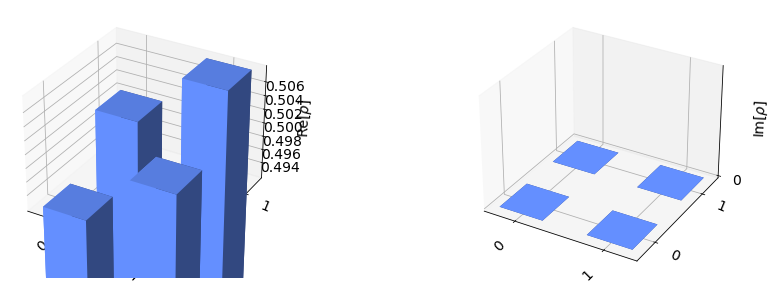

In [7]:
plot_state_city(state_result_1a.value)

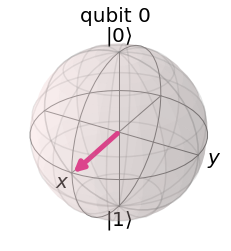

In [8]:
plot_bloch_multivector(state_result_1a.value)

In [9]:
fid_result_1a_simulator = circuit_1a_data.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result_1a_simulator.value))

State Fidelity = 0.99994


***ii. on the IonQ qpu (1000 shots)***

In [37]:
circuit_1a_qpu = QuantumCircuit(1)
circuit_1a_qpu.h(0)
qst_exp_1a_qpu = StateTomography(circuit_1a_qpu)
circuit_1a_qpu_data =  qst_exp_1a_qpu.run(ionq_qpu_backend, shots=1000).block_for_results()

meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


In [38]:
state_result_1a_qpu = circuit_1a_data.analysis_results("state")
print(state_result_1a_qpu.value)

DensityMatrix([[0.50199966+0.j        , 0.49991502-0.00899847j],
               [0.49991502+0.00899847j, 0.49800034+0.j        ]],
              dims=(2,))


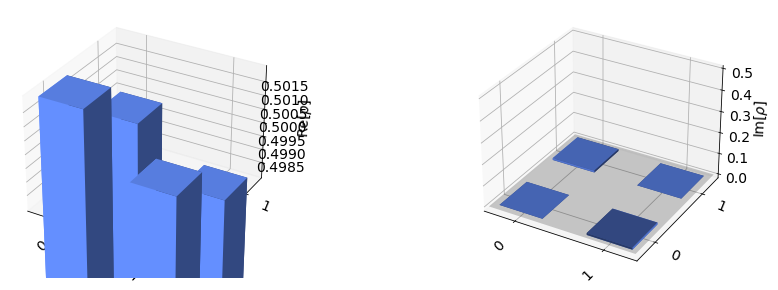

In [39]:
plot_state_city(state_result_1a_qpu.value)

In [40]:
fid_result_1a_qpu = circuit_1a_qpu_data.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result_1a_qpu.value))

State Fidelity = 0.99616


**1. (b) Prepare the entangled state $ \dfrac{1}{\sqrt{2}} ( \vert 00 \rangle + \vert 11 \rangle ) $ . Perform state tomography, visualize the density matrix using plot state city, and measure its fidelity**

***i. on the IonQ simulator (1000 shots)***

In [10]:
# 1. We first prepare the bell state

# First Create a |00> state
qc_1b_simulator = QuantumCircuit(2)

# Apply H-gate to the first qubit. We now have a |0+> state
qc_1b_simulator.h(0)
qc_1b_simulator.barrier()

# Apply a CNOT gate. We now have a bell sate
qc_1b_simulator.cx(0,1)
qc_1b_simulator.barrier()
qc_1b_simulator.draw()

# 2. Now we run state tomography 

qst_exp_1b_simulator = StateTomography(qc_1b_simulator)
qc_1b_simulator_data =  qst_exp_1b_simulator.run(ionq_simulator_backend, shots=1000).block_for_results()


meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and 

In [11]:
state_result_1b_simulator = qc_1b_simulator_data.analysis_results("state")
print(state_result_1b_simulator.value)

DensityMatrix([[ 4.93098403e-01+0.00000000e+00j,
                 3.65496881e-03-7.78033147e-03j,
                -4.01323733e-03+4.04156206e-03j,
                 4.92926574e-01-4.95725263e-03j],
               [ 3.65496881e-03+7.78033147e-03j,
                 2.53436179e-03-2.16840434e-19j,
                -7.17670988e-06-2.89393230e-03j,
                 6.42479869e-03+4.28077461e-03j],
               [-4.01323733e-03-4.04156206e-03j,
                -7.17670988e-06+2.89393230e-03j,
                 3.50058286e-03+0.00000000e+00j,
                 1.95933492e-04-8.94583307e-04j],
               [ 4.92926574e-01+4.95725263e-03j,
                 6.42479869e-03-4.28077461e-03j,
                 1.95933492e-04+8.94583307e-04j,
                 5.00866653e-01+8.67361738e-19j]],
              dims=(2, 2))


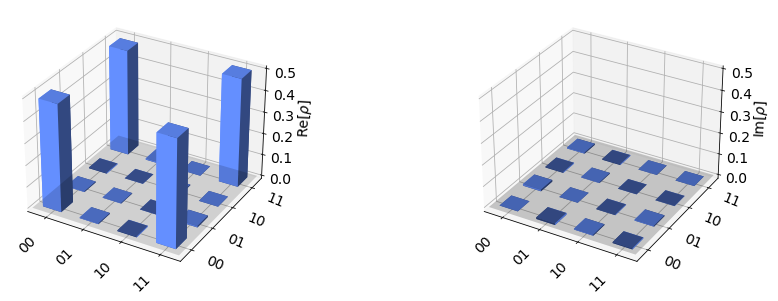

In [12]:
plot_state_city(state_result_1b_simulator.value)

In [13]:
fid_result_1b_simulator = qc_1b_simulator_data.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result_1b_simulator.value))

State Fidelity = 0.98991


***ii. Check the cost estimate on the IonQ qpu. Since there are many circuits being sent as past of two-qubit tomography***

In [14]:
qc_1b_costCalc = QuantumCircuit(2)
qc_1b_costCalc.h(0)
qc_1b_costCalc.cx(0,1)

qst_exp_1b_costCalc = StateTomography(qc_1b_costCalc)
circ_1b_costCalc = qiskit.transpile(qst_exp_1b_costCalc.circuits(), ionq_qpu_backend)
for c in circ_1b_costCalc:
    cost = ionq_qpu_backend.estimate_cost(c, shots=1000)
    print(cost)


{'additional_properties': {}, 'currency_code': 'USD', 'events': [<azure.quantum._client.models._models_py3.UsageEvent object at 0x7f8177f5e9d0>, <azure.quantum._client.models._models_py3.UsageEvent object at 0x7f8177e96e10>], 'estimated_total': 1.0}
{'additional_properties': {}, 'currency_code': 'USD', 'events': [<azure.quantum._client.models._models_py3.UsageEvent object at 0x7f81848ed190>, <azure.quantum._client.models._models_py3.UsageEvent object at 0x7f81848ed710>], 'estimated_total': 1.0}
{'additional_properties': {}, 'currency_code': 'USD', 'events': [<azure.quantum._client.models._models_py3.UsageEvent object at 0x7f81849790d0>, <azure.quantum._client.models._models_py3.UsageEvent object at 0x7f8177e96e10>], 'estimated_total': 1.0}
{'additional_properties': {}, 'currency_code': 'USD', 'events': [<azure.quantum._client.models._models_py3.UsageEvent object at 0x7f8177e96ed0>, <azure.quantum._client.models._models_py3.UsageEvent object at 0x7f8177e96d10>], 'estimated_total': 1.0}


***iii. on the IonQ qpu (1000 shots)***

In [29]:
qc_1b_qpu = QuantumCircuit(2)
qc_1b_qpu.h(0)
qc_1b_qpu.cx(0,1)

qst_exp_1b_qpu = StateTomography(qc_1b_qpu)
circuit_1b_qpu_job =  qst_exp_1b_qpu.run(ionq_qpu_backend, shots=1000)

meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored
meas_level is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and 

In [6]:
qc_1b_qpu = QuantumCircuit(2)
qc_1b_qpu.h(0)
qc_1b_qpu.cx(0,1)

qst_exp_1b_qpu = StateTomography(qc_1b_qpu)

job_ids_1b =['5f9f8f7c-b9f7-11ec-931b-00155d1640c4', '601f06e4-b9f7-11ec-931b-00155d1640c4', '6043d03c-b9f7-11ec-931b-00155d1640c4', '606b801e-b9f7-11ec-931b-00155d1640c4', '609af484-b9f7-11ec-931b-00155d1640c4', '60b8a2fe-b9f7-11ec-931b-00155d1640c4', '60daf2aa-b9f7-11ec-931b-00155d1640c4', '6104db06-b9f7-11ec-931b-00155d1640c4', '61286742-b9f7-11ec-931b-00155d1640c4']

jobs_1b = [ionq_qpu_backend.retrieve_job(id) for id in job_ids_1b]

In [8]:
circuit_1b_qpu_data = ExperimentData(experiment=qst_exp_1b_qpu)
circuit_1b_qpu_data.add_data(jobs_1b)
circuit_1b_qpu_data = qst_exp_1b_qpu.analysis.run(circuit_1b_qpu_data)


In [10]:
state_result_1b_qpu = circuit_1b_qpu_data.analysis_results('state')
print(state_result_1b_qpu.value)

DensityMatrix([[ 0.49009368+0.j        , -0.00204942-0.00676052j,
                 0.00916363-0.01287093j,  0.47305564-0.00163564j],
               [-0.00204942+0.00676052j,  0.01576863+0.j        ,
                -0.00357215-0.01366999j,  0.00852086-0.00077858j],
               [ 0.00916363+0.01287093j, -0.00357215+0.01366999j,
                 0.01613681+0.j        ,  0.00930784+0.02723092j],
               [ 0.47305564+0.00163564j,  0.00852086+0.00077858j,
                 0.00930784-0.02723092j,  0.47800088+0.j        ]],
              dims=(2, 2))


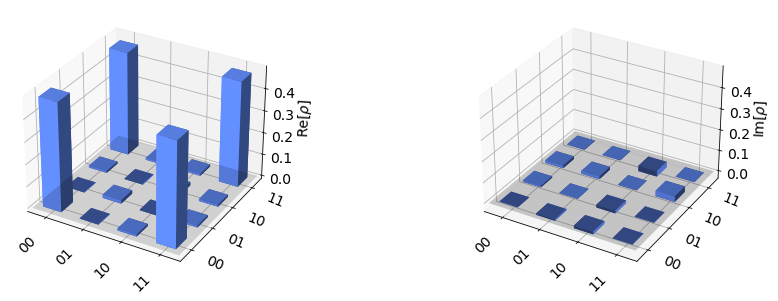

In [11]:
plot_state_city(state_result_1b_qpu.value)

In [12]:
fid_result_1b_qpu = circuit_1b_qpu_data.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result_1b_qpu.value))

State Fidelity = 0.95710


**1. (c)  Prepare a three qubit circuit to prepare and teleport the state $ \dfrac{1}{\sqrt{2}} ( \vert 0 \rangle + \vert 1 \rangle )$ by preparing and using the state $ \dfrac{1}{\sqrt{2}} ( \vert 00 \rangle + \vert 11 \rangle )$. Use the deferred measure√ ment method (Fig. 4.15 in N&C). Perform state tomography on the final teleported state, visualize the density matrix using both plot state city and plot bloch multivector, and measure its fidelity[1] In this case, you cannot use StateTomography. Modify the circuit to run the three measurements on the teleported qubit needed for single qubit tomography. **

_**(i). on the Aer or Qasm simulator (this will work for the standard, measurementbased teleportation circuit as well).**_

Measure in Z basis

In [14]:
qc_1c_simulator = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1c_simulator.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1c_simulator.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1c_simulator.cx(1,2)

qc_1c_simulator.barrier()

# 2.  Apply Gates for Teleportation 

qc_1c_simulator.cx(0,1)

qc_1c_simulator.h(0)

qc_1c_simulator.cx(1,2)

qc_1c_simulator.cz(0,2)

qc_1c_simulator.barrier()

# 3.  Measure in the Z basis

qc_1c_simulator.measure(2,0)

qc_1c_simulator.draw()

┌───┐      ░      ┌───┐    ░    
q_0: ┤ H ├──────░───■──┤ H ├─■──░────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░    
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤M├
          └───┘ ░      └───┘    ░ └╥┘
c: 1/══════════════════════════════╩═
                                   0

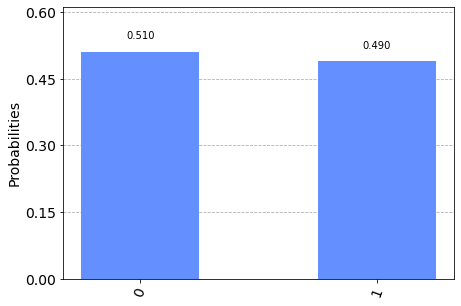

In [15]:
qobj = assemble(qc_1c_simulator)  # Assemble circuit into a Qobj that can be run
counts = aer_simulator_backend.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)

Measure in X basis

In [16]:
qc_1c_simulator = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1c_simulator.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1c_simulator.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1c_simulator.cx(1,2)

qc_1c_simulator.barrier()

# 2.  Apply Gates for Teleportation 

qc_1c_simulator.cx(0,1)

qc_1c_simulator.h(0)

qc_1c_simulator.cx(1,2)

qc_1c_simulator.cz(0,2)

qc_1c_simulator.barrier()

# 3.  Measure in the +- basis

qc_1c_simulator.h(2)

qc_1c_simulator.measure(2,0)

qc_1c_simulator.draw()

┌───┐      ░      ┌───┐    ░         
q_0: ┤ H ├──────░───■──┤ H ├─■──░─────────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░         
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░─────────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌───┐┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤ H ├┤M├
          └───┘ ░      └───┘    ░ └───┘└╥┘
c: 1/═══════════════════════════════════╩═
                                        0

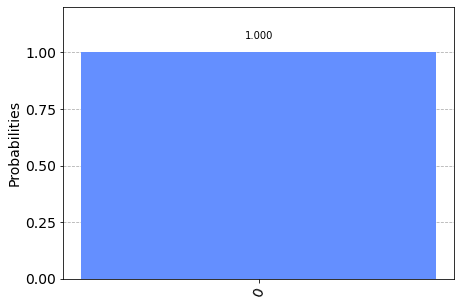

In [17]:
qobj = assemble(qc_1c_simulator)  # Assemble circuit into a Qobj that can be run
counts = aer_simulator_backend.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)

In [18]:
qc_1c_simulator = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1c_simulator.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1c_simulator.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1c_simulator.cx(1,2)

qc_1c_simulator.barrier()

# 2.  Apply Gates for Teleportation 

qc_1c_simulator.cx(0,1)

qc_1c_simulator.h(0)

qc_1c_simulator.cx(1,2)

qc_1c_simulator.cz(0,2)

qc_1c_simulator.barrier()

# 3.  Measure in the Y basis

qc_1c_simulator.sdg(2)

qc_1c_simulator.h(2)

qc_1c_simulator.measure(2,0)

qc_1c_simulator.draw()

┌───┐      ░      ┌───┐    ░                
q_0: ┤ H ├──────░───■──┤ H ├─■──░────────────────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░                
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░────────────────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌─────┐┌───┐┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤ Sdg ├┤ H ├┤M├
          └───┘ ░      └───┘    ░ └─────┘└───┘└╥┘
c: 1/══════════════════════════════════════════╩═
                                               0

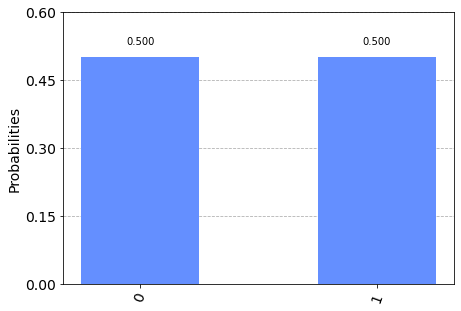

In [19]:
qobj = assemble(qc_1c_simulator)  # Assemble circuit into a Qobj that can be run
counts = aer_simulator_backend.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)

From the expectation values, we see that $<X> = 1, <Y> = <Z> = 0$. So density matrix $\rho$ can be calculated as:

$$ \rho = \dfrac{ \mathbf{I} + 1 \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} + 0\begin{bmatrix} 0 & i \\ i & 0 \end{bmatrix} + 0 \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} }{2} =  \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix} $$


In [13]:
mat = np.matrix([[0.5, 0.5], [0.5, 0.5]])
rho = DensityMatrix(mat,dims=(2,))

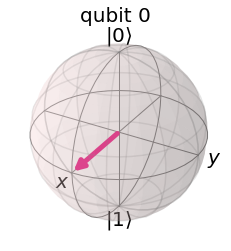

In [14]:
plot_bloch_multivector(rho)

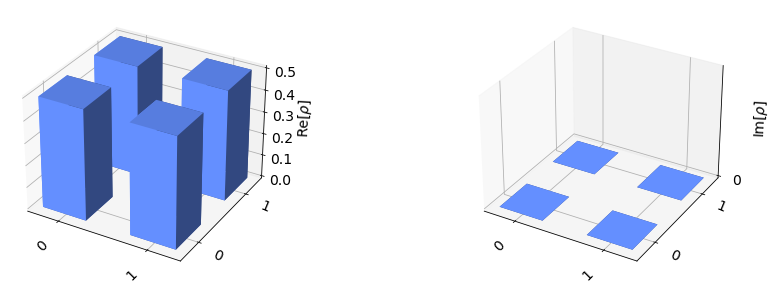

In [15]:
plot_state_city(rho)

_**(ii). on the IonQ simulator .**_

In [26]:
qc_1c_ionq_simulator = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1c_ionq_simulator.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1c_ionq_simulator.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1c_ionq_simulator.cx(1,2)

qc_1c_ionq_simulator.barrier()

# 2.  Apply Gates for Teleportation 

qc_1c_ionq_simulator.cx(0,1)

qc_1c_ionq_simulator.h(0)

qc_1c_ionq_simulator.cx(1,2)

qc_1c_ionq_simulator.cz(0,2)

qc_1c_ionq_simulator.barrier()

# 3.  Measure in the Z basis

qc_1c_ionq_simulator.measure(2,0)

qc_1c_ionq_simulator.draw()

┌───┐      ░      ┌───┐    ░    
q_0: ┤ H ├──────░───■──┤ H ├─■──░────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░    
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤M├
          └───┘ ░      └───┘    ░ └╥┘
c: 1/══════════════════════════════╩═
                                   0

...........

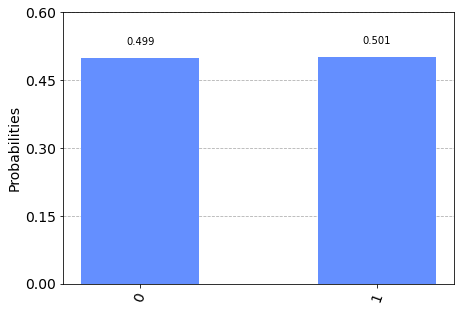

In [27]:
qobj_ionq_simulator = assemble(qc_1c_ionq_simulator)  # Assemble circuit into a Qobj that can be run
counts_ionq_simulator = ionq_simulator_backend.run(qobj_ionq_simulator).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts_ionq_simulator)

In [24]:
qc_1c_ionq_simulator = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1c_ionq_simulator.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1c_ionq_simulator.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1c_ionq_simulator.cx(1,2)

qc_1c_ionq_simulator.barrier()

# 2.  Apply Gates for Teleportation 

qc_1c_ionq_simulator.cx(0,1)

qc_1c_ionq_simulator.h(0)

qc_1c_ionq_simulator.cx(1,2)

qc_1c_ionq_simulator.cz(0,2)

qc_1c_ionq_simulator.barrier()

# 3.  Measure in the +- basis

qc_1c_ionq_simulator.h(2)

qc_1c_ionq_simulator.measure(2,0)

qc_1c_ionq_simulator.draw()

┌───┐      ░      ┌───┐    ░         
q_0: ┤ H ├──────░───■──┤ H ├─■──░─────────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░         
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░─────────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌───┐┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤ H ├┤M├
          └───┘ ░      └───┘    ░ └───┘└╥┘
c: 1/═══════════════════════════════════╩═
                                        0

............

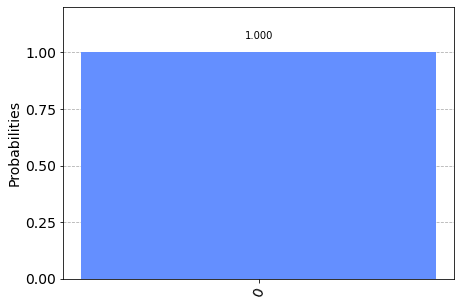

In [25]:
qobj_ionq_simulator = assemble(qc_1c_ionq_simulator)  # Assemble circuit into a Qobj that can be run
counts_ionq_simulator = ionq_simulator_backend.run(qobj_ionq_simulator).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts_ionq_simulator)

In [21]:
qc_1c_ionq_simulator = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1c_ionq_simulator.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1c_ionq_simulator.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1c_ionq_simulator.cx(1,2)

qc_1c_ionq_simulator.barrier()

# 2.  Apply Gates for Teleportation 

qc_1c_ionq_simulator.cx(0,1)

qc_1c_ionq_simulator.h(0)

qc_1c_ionq_simulator.cx(1,2)

qc_1c_ionq_simulator.cz(0,2)

qc_1c_ionq_simulator.barrier()

# 3.  Measure in the Y basis

qc_1c_ionq_simulator.sdg(2)

qc_1c_ionq_simulator.h(2)

qc_1c_ionq_simulator.measure(2,0)

qc_1c_ionq_simulator.draw()

┌───┐      ░      ┌───┐    ░                
q_0: ┤ H ├──────░───■──┤ H ├─■──░────────────────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░                
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░────────────────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌─────┐┌───┐┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤ Sdg ├┤ H ├┤M├
          └───┘ ░      └───┘    ░ └─────┘└───┘└╥┘
c: 1/══════════════════════════════════════════╩═
                                               0

............

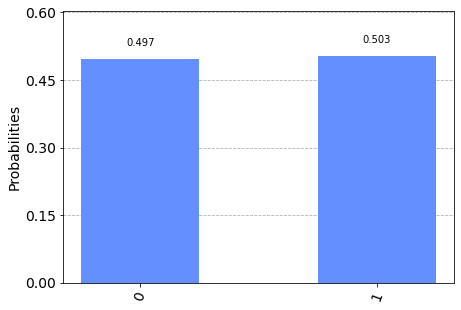

In [23]:
qobj_ionq_simulator = assemble(qc_1c_ionq_simulator)  # Assemble circuit into a Qobj that can be run
counts_ionq_simulator = ionq_simulator_backend.run(qobj_ionq_simulator).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts_ionq_simulator)

From the expectation values, we see that $<X> = 1, <Y> = <Z> = 0$. So density matrix $\rho$ can be calculated as:

$$ \rho = \dfrac{ \mathbf{I} + 1 \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} + 0\begin{bmatrix} 0 & i \\ i & 0 \end{bmatrix} + 0 \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} }{2} =  \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix} $$


In [16]:
mat = np.matrix([[0.5, 0.5], [0.5, 0.5]])
rho = DensityMatrix(mat,dims=(2,))

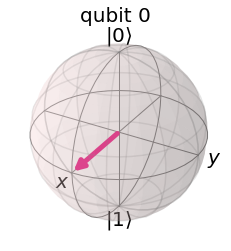

In [17]:
plot_bloch_multivector(rho)

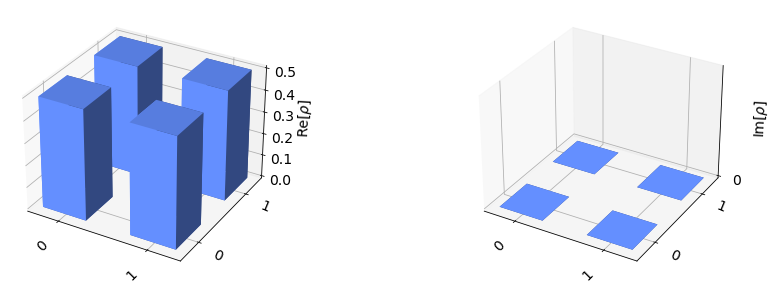

In [18]:
plot_state_city(rho)

_**(ii). on the IonQ qpu .**_

In [30]:
qc_1c_ionq_qpu = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1c_ionq_qpu.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1c_ionq_qpu.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1c_ionq_qpu.cx(1,2)

qc_1c_ionq_qpu.barrier()

# 2.  Apply Gates for Teleportation 

qc_1c_ionq_qpu.cx(0,1)

qc_1c_ionq_qpu.h(0)

qc_1c_ionq_qpu.cx(1,2)

qc_1c_ionq_qpu.cz(0,2)

qc_1c_ionq_qpu.barrier()

# 3.  Measure in the Z basis

qc_1c_ionq_qpu.measure(2,0)

qc_1c_ionq_qpu.draw()


┌───┐      ░      ┌───┐    ░    
q_0: ┤ H ├──────░───■──┤ H ├─■──░────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░    
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤M├
          └───┘ ░      └───┘    ░ └╥┘
c: 1/══════════════════════════════╩═
                                   0

In [26]:
job1c_ionq_qpu = ionq_qpu_backend.run(qc_1c_ionq_qpu,shots=1000)

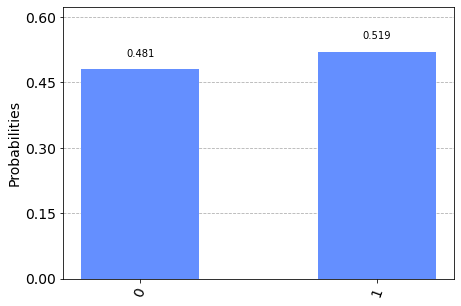

In [37]:
counts_ionq_qpu_z = job1c_ionq_qpu.result().get_counts()
plot_histogram(counts_ionq_qpu_z)

In [38]:
qc_1cx_ionq_qpu = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1cx_ionq_qpu.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1cx_ionq_qpu.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1cx_ionq_qpu.cx(1,2)

qc_1cx_ionq_qpu.barrier()

# 2.  Apply Gates for Teleportation 

qc_1cx_ionq_qpu.cx(0,1)

qc_1cx_ionq_qpu.h(0)

qc_1cx_ionq_qpu.cx(1,2)

qc_1cx_ionq_qpu.cz(0,2)

qc_1cx_ionq_qpu.barrier()

# 3.  Measure in the +- basis

qc_1cx_ionq_qpu.h(2)

qc_1cx_ionq_qpu.measure(2,0)

qc_1cx_ionq_qpu.draw()


┌───┐      ░      ┌───┐    ░         
q_0: ┤ H ├──────░───■──┤ H ├─■──░─────────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░         
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░─────────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌───┐┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤ H ├┤M├
          └───┘ ░      └───┘    ░ └───┘└╥┘
c: 1/═══════════════════════════════════╩═
                                        0

In [28]:
job1c_ionq_qpu_x = ionq_qpu_backend.run(qc_1cx_ionq_qpu,shots=1000)

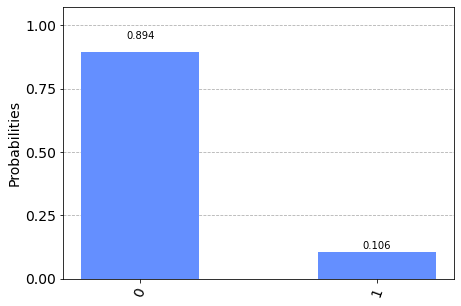

In [39]:
counts_ionq_qpu_x = job1c_ionq_qpu_x.result().get_counts()
plot_histogram(counts_ionq_qpu_x)

In [31]:
qc_1cy_ionq_qpu = QuantumCircuit(3,1)

# 1. Preparation

#    Prepare state \Psi for Alice
qc_1cy_ionq_qpu.h(0)

#    Prepare the bell state on qubit 1 and 2 for Bob
# Apply H-gate to the q1 qubit. We now have a |0+> state
qc_1cy_ionq_qpu.h(1)
# Apply a CNOT gate across q1 and q2. We now have a bell sate
qc_1cy_ionq_qpu.cx(1,2)

qc_1cy_ionq_qpu.barrier()

# 2.  Apply Gates for Teleportation 

qc_1cy_ionq_qpu.cx(0,1)

qc_1cy_ionq_qpu.h(0)

qc_1cy_ionq_qpu.cx(1,2)

qc_1cy_ionq_qpu.cz(0,2)

qc_1cy_ionq_qpu.barrier()

# 3.  Measure in the Y basis

qc_1cy_ionq_qpu.sdg(2)

qc_1cy_ionq_qpu.h(2)

qc_1cy_ionq_qpu.measure(2,0)

qc_1cy_ionq_qpu.draw()

┌───┐      ░      ┌───┐    ░                
q_0: ┤ H ├──────░───■──┤ H ├─■──░────────────────
     ├───┤      ░ ┌─┴─┐└───┘ │  ░                
q_1: ┤ H ├──■───░─┤ X ├──■───┼──░────────────────
     └───┘┌─┴─┐ ░ └───┘┌─┴─┐ │  ░ ┌─────┐┌───┐┌─┐
q_2: ─────┤ X ├─░──────┤ X ├─■──░─┤ Sdg ├┤ H ├┤M├
          └───┘ ░      └───┘    ░ └─────┘└───┘└╥┘
c: 1/══════════════════════════════════════════╩═
                                               0

In [32]:
job1c_ionq_qpu_y = ionq_qpu_backend.run(qc_1cy_ionq_qpu,shots=1000)

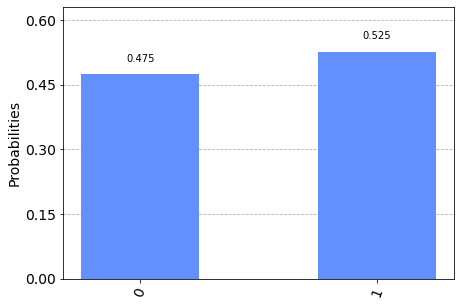

In [40]:
counts_ionq_qpu_y = job1c_ionq_qpu_y.result().get_counts()
plot_histogram(counts_ionq_qpu_y)

From the expectation values, we see that $<X> = 1, <Y> = <Z> = 0$. So density matrix $\rho$ can be calculated as:

$$ \rho = \dfrac{ \mathbf{I} + 0.894 \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} + 0\begin{bmatrix} 0 & i \\ i & 0 \end{bmatrix} + 0 \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} }{2} =  \begin{bmatrix} 0.5 & 0.447 \\ 0.447 & 0.5 \end{bmatrix} $$


In [41]:
mat = np.matrix([[0.5, 0.447], [0.447, 0.5]])
rho = DensityMatrix(mat,dims=(2,))

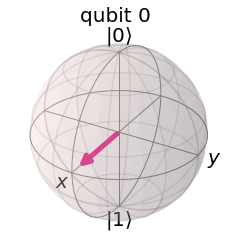

In [42]:
plot_bloch_multivector(rho)

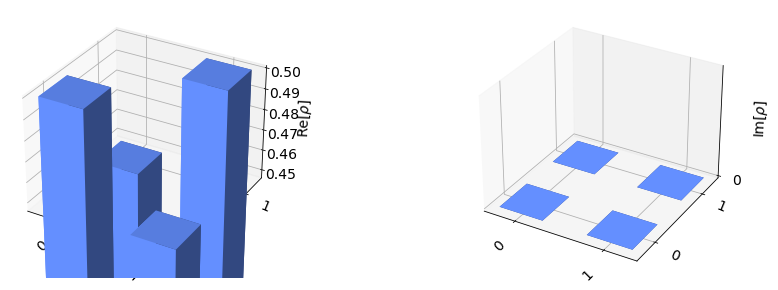

In [43]:
plot_state_city(rho)

Comparing the result from 1c to 1a, we can see a very similar density matrix, meaning that Alice's $\psi$ state is succesfully teleported to the q2 qubit that is owned by Bob.

However, we do observe that the magnitude of the vector gets smaller. This is the result of quantum error.